In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import os

In [2]:
os.getcwd()

'/home/otto.tavares/public/iltbi/validation/hypothesis_testing/Lifelong_Learning'

In [8]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 16.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
#stats_sh_sc_ma = pd.read_csv('shenzhen_santacasa_manaus.csv')
continuado_real_stats = pd.read_excel('continuado_figuras_merito.xlsx', sheet_name='Real')
continuado_wgan_stats = pd.read_excel('continuado_figuras_merito.xlsx', sheet_name='WGAN_soFC')
continuado_p2p_stats = pd.read_excel('continuado_figuras_merito.xlsx', sheet_name='P2P_soFC')
print('Real - Head Data')
print(continuado_real_stats.head())
print('WGAN - Head Data')
print(continuado_wgan_stats.head())
print('P2P - Head Data')
print(continuado_p2p_stats.head())

Real - Head Data
                   Modelo  Sens TB Val  Spec TB Val  SP TB Val  \
0       aux_test0_val0,pt         97.1         75.8       86.1   
1       aux_test0_val1,pt         93.9         42.4       65.6   
2  Shenzhen_test0_val2,pt         90.9         81.8       86.3   
3       aux_test0_val3,pt         90.9         72.7       81.6   
4       aux_test0_val4,pt         90.9         78.8       84.7   

   Sens TB Treino  Spec TB Treino  SP TB Treino  Sens TB Treino + Val  \
0            92.5            61.9          76.5                  93.0   
1            97.8            38.8          64.9                  97.4   
2            95.2            71.5          82.9                  94.7   
3            95.5            70.0          82.3                  95.0   
4            87.0            86.2          86.6                  87.4   

   Spec TB Treino + Val  SP TB Treino + Val  Sens TB Teste  Spec TB Teste  \
0                  63.5                77.6           88.2           6

In [4]:
continuado_real_stats.shape

(90, 16)

In [5]:
#continuado_real_stats = continuado_real_stats[continuado_real_stats['Modelo'].str.contains("Shenzhen")]
continuado_real_stats

,Modelo,Sens TB Val,Spec TB Val,SP TB Val,Sens TB Treino,Spec TB Treino,SP TB Treino,Sens TB Treino + Val,Spec TB Treino + Val,SP TB Treino + Val,Sens TB Teste,Spec TB Teste,SP TB Teste,Sens TB Todos,Spec TB Todos,SP TB Todos
0,"aux_test0_val0,pt",97.1,75.8,86.1,92.5,61.9,76.5,93.0,63.5,77.6,88.2,63.6,75.4,92.6,63.5,77.3
1,"aux_test0_val1,pt",93.9,42.4,65.6,97.8,38.8,64.9,97.4,39.2,65.0,94.1,45.5,67.6,97.0,39.9,65.3
2,"Shenzhen_test0_val2,pt",90.9,81.8,86.3,95.2,71.5,82.9,94.7,72.7,83.3,85.3,78.8,82.0,93.8,73.3,83.2
3,"aux_test0_val3,pt",90.9,72.7,81.6,95.5,70.0,82.3,95.0,70.3,82.2,82.4,72.7,77.5,93.8,70.6,81.7
4,"aux_test0_val4,pt",90.9,78.8,84.7,87.0,86.2,86.6,87.4,85.3,86.4,85.3,90.9,88.1,87.2,85.9,86.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,"aux_test9_val4,pt",90.9,69.7,80.0,94.8,70.1,82.0,94.4,70.1,81.8,97.1,62.5,78.8,94.6,69.3,81.5
86,"Shenzhen_test9_val5,pt",90.9,81.8,86.3,87.0,86.2,86.6,87.4,85.7,86.6,94.1,78.1,85.9,88.1,85.0,86.5
87,"aux_test9_val6,pt",91.2,56.2,72.7,89.6,61.5,74.8,89.7,60.9,74.6,94.1,43.8,66.5,90.2,59.2,73.9
88,"aux_test9_val7,pt",91.2,81.2,86.1,81.7,89.3,85.5,82.8,88.4,85.6,91.2,78.1,84.5,83.6,87.4,85.5


In [6]:
continuado_wgan_stats.shape

(90, 16)

In [7]:
#continuado_wgan_stats = continuado_wgan_stats[continuado_wgan_stats['Modelo'].str.contains("Shenzhenfinetune")]
continuado_wgan_stats

,Modelo,Sens TB Val,Spec TB Val,SP TB Val,Sens TB Treino,Spec TB Treino,SP TB Treino,Sens TB Treino + Val,Spec TB Treino + Val,SP TB Treino + Val,Sens TB Teste,Spec TB Teste,SP TB Teste,Sens TB Todos,Spec TB Todos,SP TB Todos
0,"aux_test0_val0_test0_val0,pt",91.2,75.8,83.3,87.3,71.5,79.2,87.7,72.0,79.7,88.2,75.8,81.9,87.8,72.4,79.9
1,"aux_test0_val1_test0_val1,pt",90.9,45.5,66.2,97.8,47.3,70.2,97.0,47.1,69.8,97.1,42.4,66.9,97.0,46.6,69.5
2,"aux_test0_val2_test0_val2,pt",90.9,84.8,87.9,95.5,75.4,85.2,95.0,76.5,85.5,85.3,87.9,86.6,94.0,77.6,85.6
3,"Shenzhenfinetune_test0_val3,pt",93.9,72.7,83.0,100.0,88.5,94.1,99.3,86.7,92.9,88.2,87.9,88.1,98.2,86.8,92.4
4,"aux_test0_val4_test0_val4,pt",90.9,75.8,83.2,87.7,83.8,85.8,88.1,82.9,85.5,85.3,90.9,88.1,87.8,83.7,85.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,"aux_test9_val4_test9_val4,pt",90.9,75.8,83.2,94.1,75.1,84.3,93.7,75.2,84.2,94.1,65.6,79.2,93.8,74.2,83.7
86,"Shenzhenfinetune_test9_val5,pt",90.9,84.8,87.9,100.0,97.3,98.7,99.0,95.9,97.5,94.1,84.4,89.2,98.5,94.8,96.6
87,"aux_test9_val6_test9_val6,pt",94.1,53.1,72.2,91.4,56.5,72.9,91.7,56.1,72.8,94.1,37.5,62.5,92.0,54.3,71.9
88,"aux_test9_val7_test9_val7,pt",91.2,71.9,81.2,84.7,83.2,84.0,85.4,82.0,83.7,88.2,78.1,83.1,85.7,81.6,83.6


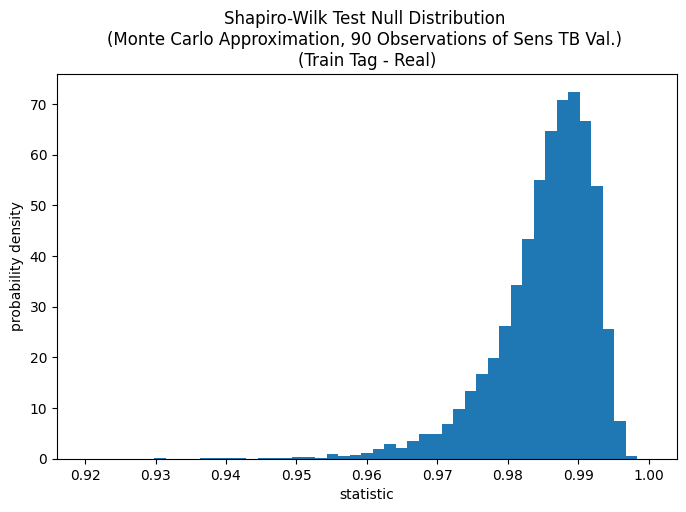

In [8]:
stat2look = 'Sens TB Val'
serie_size = len(continuado_real_stats[stat2look])
train_tag = 'Real'
def statistic(x):
    # Get only the `shapiro` statistic; ignore its p-value
    return stats.shapiro(x).statistic
ref = stats.monte_carlo_test(continuado_real_stats[stat2look], stats.norm.rvs, statistic, alternative='less')

fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(0.92, 1, 50)
def plot(ax):  # we'll reuse this
    ax.hist(ref.null_distribution, density=True, bins=bins)
    ax.set_title(f"Shapiro-Wilk Test Null Distribution \n"
                 f"(Monte Carlo Approximation, {serie_size} Observations of {stat2look}.) \n"
                 f"(Train Tag - {train_tag})")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

The p-value is 0.0001. Therefore the distribution is not a Gaussian with 99% level of confidence


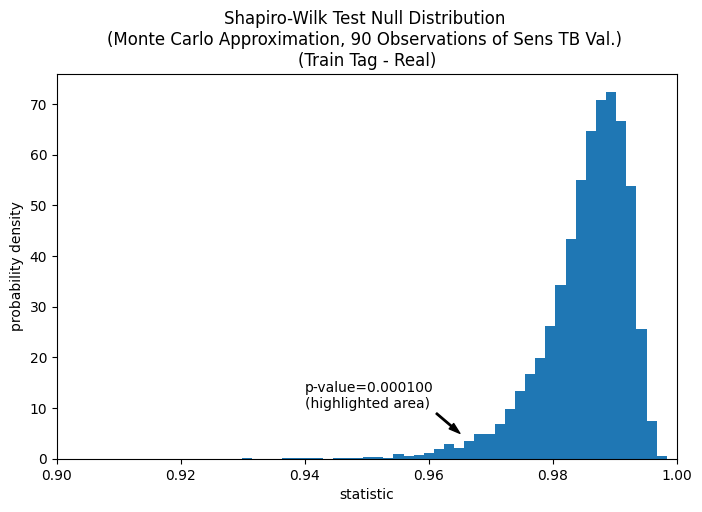

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
annotation = (f'p-value={ref.pvalue:.6f}\n(highlighted area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (0.965, 5), (0.94, 10), arrowprops=props)
i_extreme = np.where(bins <= ref.statistic)[0]
for i in i_extreme:
    ax.patches[i].set_color('C1')
plt.xlim(0.9, 1)
#plt.ylim(0, 4)
plt.show
if ref.pvalue < 0.01:
    print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 99% level of confidence")
else:
    if ref.pvalue < 0.05:
        print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 95% level of confidence")
    else:
        if ref.pvalue < 0.1:
            print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 90% level of confidence")
        else:
            print(f"The p-value is {ref.pvalue}. Therefore there is no evidence that the distribution is different from a Gaussian.")


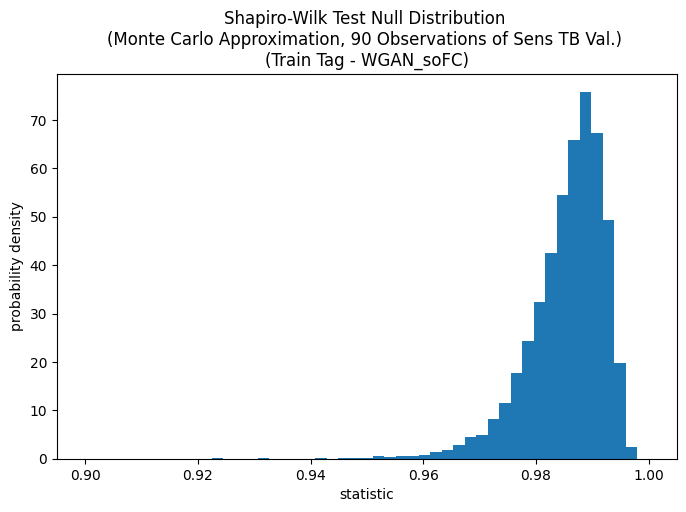

In [10]:
stat2look = 'Sens TB Val'
serie_size = len(continuado_wgan_stats[stat2look])
train_tag_synth = 'WGAN_soFC'
def statistic(x):
    # Get only the `shapiro` statistic; ignore its p-value
    return stats.shapiro(x).statistic
ref = stats.monte_carlo_test(continuado_wgan_stats[stat2look], stats.norm.rvs, statistic, alternative='less')

fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(0.9, 1, 50)
def plot(ax):  # we'll reuse this
    ax.hist(ref.null_distribution, density=True, bins=bins)
    ax.set_title(f"Shapiro-Wilk Test Null Distribution \n"
                 f"(Monte Carlo Approximation, {serie_size} Observations of {stat2look}.) \n"
                 f"(Train Tag - {train_tag_synth})")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

The p-value is 0.0001. Therefore the distribution is not a Gaussian with 99% level of confidence


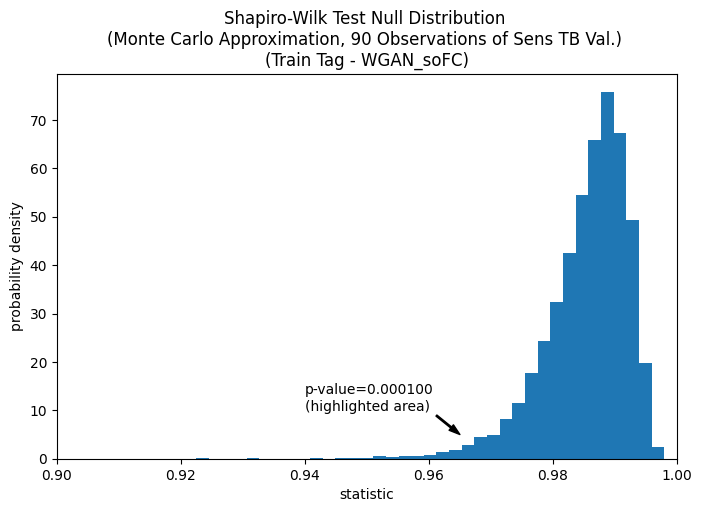

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
annotation = (f'p-value={ref.pvalue:.6f}\n(highlighted area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (0.965, 5), (0.94, 10), arrowprops=props)
i_extreme = np.where(bins <= ref.statistic)[0]
for i in i_extreme:
    ax.patches[i].set_color('C1')
plt.xlim(0.9, 1)
#plt.ylim(0, 4)
plt.show
if ref.pvalue < 0.01:
    print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 99% level of confidence")
else:
    if ref.pvalue < 0.05:
        print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 95% level of confidence")
    else:
        if ref.pvalue < 0.1:
            print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 90% level of confidence")
        else:
            print(f"The p-value is {ref.pvalue}. Therefore there is no evidence that the distribution is different from a Gaussian.")


In [12]:
#Two-Sided Test
d_two_sided = (continuado_wgan_stats[stat2look].to_numpy() - continuado_real_stats[stat2look].to_numpy())
res_two_sided = stats.wilcoxon(continuado_wgan_stats[stat2look], continuado_real_stats[stat2look], alternative='two-sided', method='auto')
res_two_sided

WilcoxonResult(statistic=115.5, pvalue=0.7147563167178593)

In [13]:
#Greater Test
d_greater = (continuado_wgan_stats[stat2look].to_numpy() - continuado_real_stats[stat2look].to_numpy())
res_greater = stats.wilcoxon(continuado_wgan_stats[stat2look], continuado_real_stats[stat2look], alternative='greater', method='auto')
res_greater

WilcoxonResult(statistic=115.5, pvalue=0.6426218416410703)

In [14]:
#Less Test
d_less = (continuado_wgan_stats[stat2look].to_numpy() - continuado_real_stats[stat2look].to_numpy())
res_less = stats.wilcoxon(continuado_wgan_stats[stat2look], continuado_real_stats[stat2look], alternative='less', method='auto')
res_less

WilcoxonResult(statistic=115.5, pvalue=0.35737815835892967)

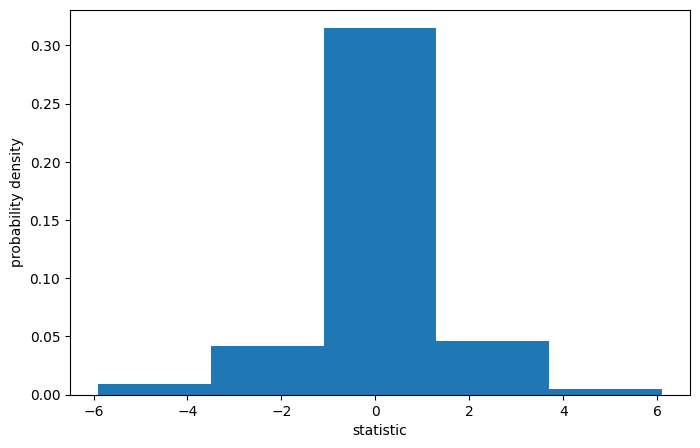

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(min(d_two_sided), max(d_two_sided), 6)
def plot(ax):  # we'll reuse this
    ax.hist(d_two_sided, density = True, bins = bins)
    #ax.set_title(f"Shapiro-Wilk Test Null Distribution \n"
    #             f"(Monte Carlo Approximation, {serie_size} Observations of {stat2look}.) \n"
    #             f"(Train Tag - {train_tag_synth})")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

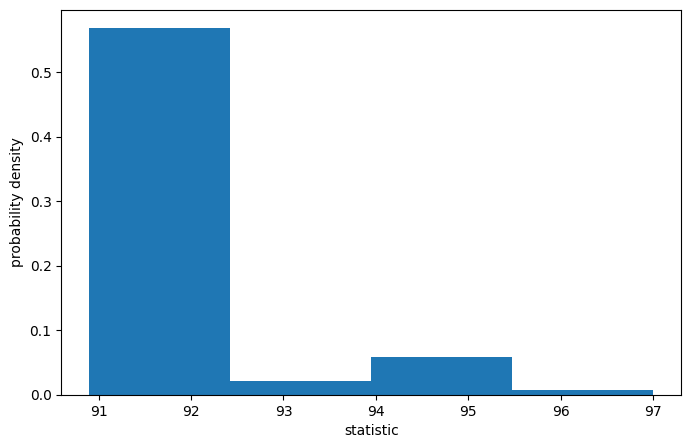

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(min(continuado_wgan_stats[stat2look]), max(continuado_wgan_stats[stat2look]), 5)
def plot(ax):  # we'll reuse this
    ax.hist(continuado_wgan_stats[stat2look], density = True, bins = bins)
    #ax.set_title(f"Shapiro-Wilk Test Null Distribution \n"
    #             f"(Monte Carlo Approximation, {serie_size} Observations of {stat2look}.) \n"
    #             f"(Train Tag - {train_tag_synth})")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

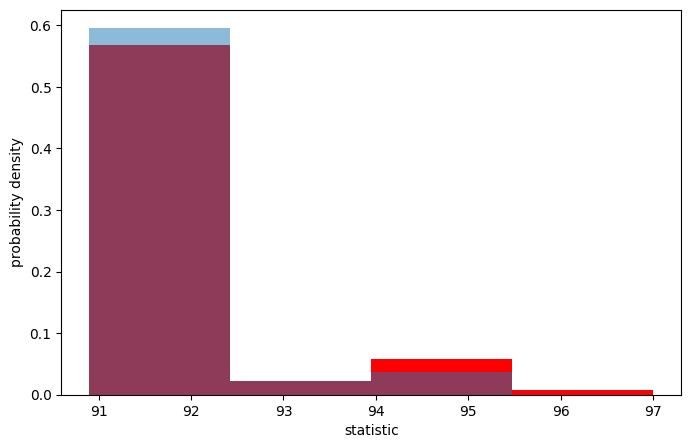

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
#bins = np.linspace(min(continuado_real_stats[stat2look]), max(continuado_real_stats[stat2look]), 15)
def plot(ax):  # we'll reuse this
    ax.hist(continuado_wgan_stats[stat2look], density = True, bins = bins, color = 'red')
    ax.hist(continuado_real_stats[stat2look], density = True, bins = bins, alpha=0.5)
    #ax.set_title(f"Shapiro-Wilk Test Null Distribution \n"
    #             f"(Monte Carlo Approximation, {serie_size} Observations of {stat2look}.) \n"
    #             f"(Train Tag - {train_tag_synth})")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

# Realizando o teste apenas para os campeões

In [5]:
continuado_real_stats = continuado_real_stats[continuado_real_stats['Modelo'].str.contains("Shenzhen")]
continuado_real_stats

,Modelo,Sens TB Val,Spec TB Val,SP TB Val,Sens TB Treino,Spec TB Treino,SP TB Treino,Sens TB Treino + Val,Spec TB Treino + Val,SP TB Treino + Val,Sens TB Teste,Spec TB Teste,SP TB Teste,Sens TB Todos,Spec TB Todos,SP TB Todos
2,"Shenzhen_test0_val2,pt",90.9,81.8,86.3,95.2,71.5,82.9,94.7,72.7,83.3,85.3,78.8,82.0,93.8,73.3,83.2
11,"Shenzhen_best1_val2,pt",90.9,90.9,90.9,93.3,83.8,88.5,93.0,84.6,88.8,94.1,78.8,86.3,93.2,84.0,88.5
18,"Shenzhen_test2_val0,pt",91.2,81.8,86.4,95.9,72.3,83.7,95.4,73.4,84.0,81.8,69.7,75.6,94.0,73.0,83.2
29,"Shenzhen_test3_val2,pt",90.9,63.6,76.7,97.0,53.5,73.6,96.4,54.6,74.0,93.9,54.5,72.9,96.1,54.6,73.9
36,"Shenzhen_test4_val0,pt",94.1,66.7,79.8,97.0,62.7,78.9,96.7,63.1,79.0,93.9,54.5,72.9,96.4,62.3,78.4
48,"Shenzhen_test5_val3,pt",90.9,78.8,84.7,95.2,78.5,86.6,94.7,78.5,86.4,90.9,72.7,81.6,94.3,77.9,85.9
59,"Shenzhen_test6_val5,pt",90.9,87.9,89.4,87.0,89.3,88.1,87.4,89.1,88.3,82.4,71.9,77.0,86.9,87.4,87.2
68,"Shenzhen_test7_val5,pt",90.9,75.8,83.2,89.6,86.6,88.1,89.7,85.4,87.5,91.2,75.0,82.9,89.9,84.4,87.1
77,"Shenzhen_test8_val5,pt",90.9,78.8,84.7,89.2,85.8,87.5,89.4,85.0,87.2,85.3,84.4,84.8,89.0,85.0,87.0
86,"Shenzhen_test9_val5,pt",90.9,81.8,86.3,87.0,86.2,86.6,87.4,85.7,86.6,94.1,78.1,85.9,88.1,85.0,86.5


In [6]:
continuado_wgan_stats = continuado_wgan_stats[continuado_wgan_stats['Modelo'].str.contains("Shenzhenfinetune")]
continuado_wgan_stats

,Modelo,Sens TB Val,Spec TB Val,SP TB Val,Sens TB Treino,Spec TB Treino,SP TB Treino,Sens TB Treino + Val,Spec TB Treino + Val,SP TB Treino + Val,Sens TB Teste,Spec TB Teste,SP TB Teste,Sens TB Todos,Spec TB Todos,SP TB Todos
3,"Shenzhenfinetune_test0_val3,pt",93.9,72.7,83.0,100.0,88.5,94.1,99.3,86.7,92.9,88.2,87.9,88.1,98.2,86.8,92.4
17,"Shenzhenfinetune_test1_val8,pt",91.2,90.6,90.9,97.8,98.9,98.3,97.0,98.0,97.5,82.4,90.9,86.6,95.5,97.2,96.4
23,"Shenzhenfinetune_test2_val5,pt",91.2,75.0,82.9,100.0,95.8,97.9,99.0,93.5,96.2,84.8,90.9,87.9,97.6,93.3,95.4
35,"Shenzhenfinetune_test3_val8,pt",91.2,93.8,92.5,98.5,99.2,98.9,97.7,98.6,98.2,87.9,93.9,90.9,96.7,98.2,97.4
40,"Shenzhenfinetune_test4_val4,pt",90.9,81.8,86.3,100.0,97.7,98.8,99.0,95.9,97.5,87.9,84.8,86.4,97.9,94.8,96.3
50,"Shenzhenfinetune_Best5_val5,pt",94.1,87.5,90.8,99.6,100.0,99.8,99.0,98.6,98.8,93.9,84.8,89.3,98.5,97.2,97.9
59,"Shenzhenfinetune_test6_val5,pt",90.9,84.8,87.9,100.0,98.1,99.0,99.0,96.6,97.8,94.1,78.1,85.9,98.5,94.8,96.6
70,"Shenzhenfinetune_test7_val7,pt",94.1,84.4,89.2,100.0,96.2,98.1,99.3,94.9,97.1,97.1,68.8,82.3,99.1,92.3,95.7
73,"Shenzhenfinetune_test8_val1,pt",94.1,87.9,91.0,99.3,94.6,96.9,98.7,93.9,96.3,79.4,90.6,84.9,96.7,93.6,95.1
86,"Shenzhenfinetune_test9_val5,pt",90.9,84.8,87.9,100.0,97.3,98.7,99.0,95.9,97.5,94.1,84.4,89.2,98.5,94.8,96.6


In [7]:
continuado_p2p_stats = continuado_p2p_stats[continuado_p2p_stats['Modelo'].str.contains("Shenzhenfinetune")]
continuado_p2p_stats

,Modelo,Sens TB Val,Spec TB Val,SP TB Val,Sens TB Treino,Spec TB Treino,SP TB Treino,Sens TB Treino + Val,Spec TB Treino + Val,SP TB Treino + Val,Sens TB Teste,Spec TB Teste,SP TB Teste,Sens TB Todos,Spec TB Todos,SP TB Todos
2,"Shenzhenfinetune_test0_val2_test0_val2,pt",90.9,84.8,87.9,94.1,75.4,84.5,93.7,76.5,84.9,82.4,84.8,83.6,92.6,77.3,84.8
11,"Shenzhenfinetune_best1_val2_test1_val2,pt",90.9,90.9,90.9,92.2,84.2,88.2,92.1,85.0,88.5,91.2,78.8,84.9,92.0,84.4,88.1
18,"Shenzhenfinetune_test2_val0_test2_val0,pt",91.2,81.8,86.4,95.9,72.3,83.7,95.4,73.4,84.0,81.8,69.7,75.6,94.0,73.0,83.2
29,"Shenzhenfinetune_test3_val2_test3_val2,pt",90.9,63.6,76.7,97.0,53.1,73.4,96.4,54.3,73.8,93.9,54.5,72.9,96.1,54.3,73.7
36,"Shenzhenfinetune_test4_val0_test4_val0,pt",94.1,66.7,79.8,97.0,62.7,78.9,96.7,63.1,79.0,93.9,48.5,69.3,96.4,61.7,78.1
48,"Shenzhenfinetune_test5_val3_test5_val3,pt",90.9,78.8,84.7,94.8,78.5,86.4,94.4,78.5,86.3,90.9,72.7,81.6,94.0,77.9,85.8
59,"Shenzhenfinetune_test6_val5_test6_val5,pt",90.9,84.8,87.9,87.0,89.3,88.1,87.4,88.8,88.1,82.4,71.9,77.0,86.9,87.1,87.0
68,"Shenzhenfinetune_test7_val5_test7_val5,pt",90.9,75.8,83.2,92.9,80.5,86.6,92.7,79.9,86.2,94.1,53.1,72.2,92.9,77.3,84.9
77,"Shenzhenfinetune_test8_val5_test8_val5,pt",90.9,78.8,84.7,89.6,85.4,87.5,89.7,84.7,87.2,85.3,84.4,84.8,89.3,84.7,87.0
86,"Shenzhenfinetune_test9_val5_test9_val5,pt",90.9,81.8,86.3,86.2,87.0,86.6,86.8,86.4,86.6,94.1,78.1,85.9,87.5,85.6,86.5


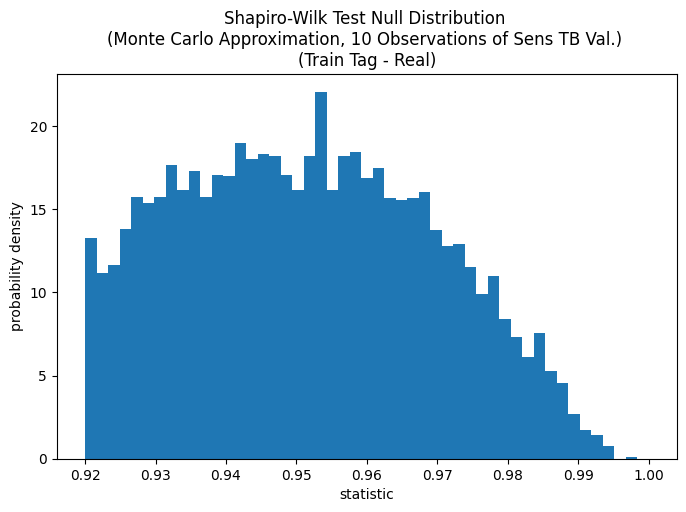

In [10]:
stat2look = 'Sens TB Val'
serie_size = len(continuado_real_stats[stat2look])
train_tag = 'Real'
def statistic(x):
    # Get only the `shapiro` statistic; ignore its p-value
    return stats.shapiro(x).statistic
ref = stats.monte_carlo_test(continuado_real_stats[stat2look], stats.norm.rvs, statistic, alternative='less')

fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(0.92, 1, 50)
def plot(ax):  # we'll reuse this
    ax.hist(ref.null_distribution, density=True, bins=bins)
    ax.set_title(f"Shapiro-Wilk Test Null Distribution \n"
                 f"(Monte Carlo Approximation, {serie_size} Observations of {stat2look}.) \n"
                 f"(Train Tag - {train_tag})")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

The p-value is 0.0001. Therefore the distribution is not a Gaussian with 99% level of confidence


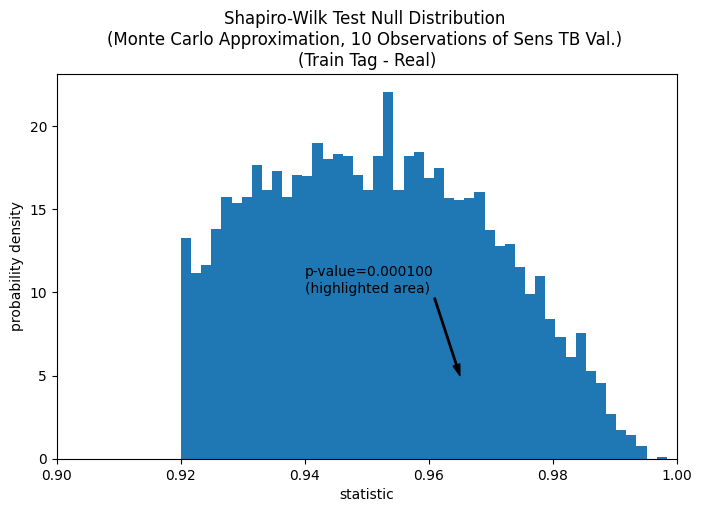

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
annotation = (f'p-value={ref.pvalue:.6f}\n(highlighted area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (0.965, 5), (0.94, 10), arrowprops=props)
i_extreme = np.where(bins <= ref.statistic)[0]
for i in i_extreme:
    ax.patches[i].set_color('C1')
plt.xlim(0.9, 1)
#plt.ylim(0, 4)
plt.show
if ref.pvalue < 0.01:
    print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 99% level of confidence")
else:
    if ref.pvalue < 0.05:
        print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 95% level of confidence")
    else:
        if ref.pvalue < 0.1:
            print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 90% level of confidence")
        else:
            print(f"The p-value is {ref.pvalue}. Therefore there is no evidence that the distribution is different from a Gaussian.")


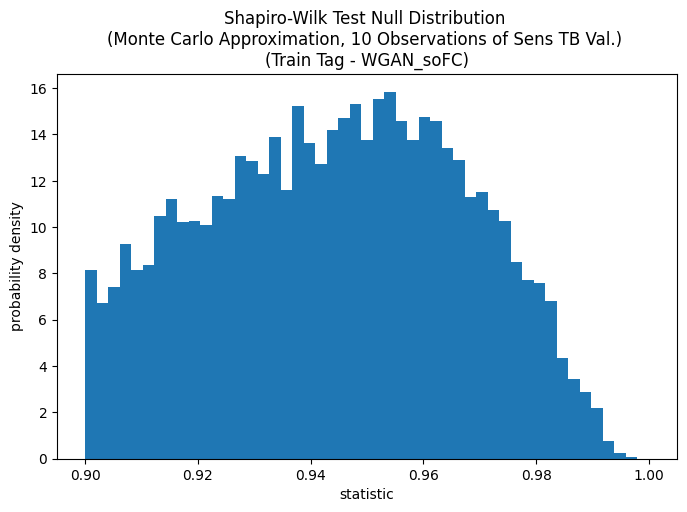

In [12]:
stat2look = 'Sens TB Val'
serie_size = len(continuado_wgan_stats[stat2look])
train_tag_synth = 'WGAN_soFC'
def statistic(x):
    # Get only the `shapiro` statistic; ignore its p-value
    return stats.shapiro(x).statistic
ref = stats.monte_carlo_test(continuado_wgan_stats[stat2look], stats.norm.rvs, statistic, alternative='less')

fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(0.9, 1, 50)
def plot(ax):  # we'll reuse this
    ax.hist(ref.null_distribution, density=True, bins=bins)
    ax.set_title(f"Shapiro-Wilk Test Null Distribution \n"
                 f"(Monte Carlo Approximation, {serie_size} Observations of {stat2look}.) \n"
                 f"(Train Tag - {train_tag_synth})")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

The p-value is 0.0006. Therefore the distribution is not a Gaussian with 99% level of confidence


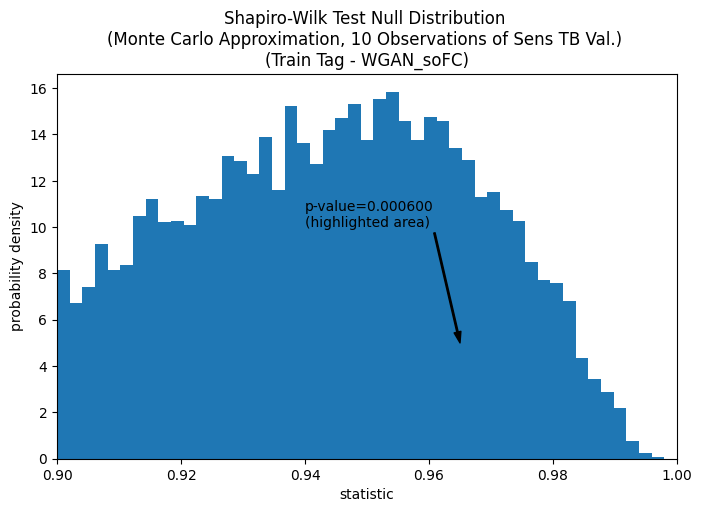

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
annotation = (f'p-value={ref.pvalue:.6f}\n(highlighted area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (0.965, 5), (0.94, 10), arrowprops=props)
i_extreme = np.where(bins <= ref.statistic)[0]
for i in i_extreme:
    ax.patches[i].set_color('C1')
plt.xlim(0.9, 1)
#plt.ylim(0, 4)
plt.show
if ref.pvalue < 0.01:
    print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 99% level of confidence")
else:
    if ref.pvalue < 0.05:
        print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 95% level of confidence")
    else:
        if ref.pvalue < 0.1:
            print(f"The p-value is {ref.pvalue}. Therefore the distribution is not a Gaussian with 90% level of confidence")
        else:
            print(f"The p-value is {ref.pvalue}. Therefore there is no evidence that the distribution is different from a Gaussian.")


In [14]:
#Two-Sided Test
d_two_sided = (continuado_wgan_stats[stat2look].to_numpy() - continuado_real_stats[stat2look].to_numpy())
res_two_sided = stats.wilcoxon(continuado_wgan_stats[stat2look], continuado_real_stats[stat2look], alternative='two-sided', method='exact')
res_two_sided

/home/otto.tavares/public/iltbi/rxp2p-cycle/p2p-cycle-env/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/otto.tavares/public/iltbi/rxp2p-cycle/p2p-cycle-env/lib/python3.10/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=5.5, pvalue=0.14269076751638635)

In [15]:
#Greater Test
d_greater = (continuado_wgan_stats[stat2look].to_numpy() - continuado_real_stats[stat2look].to_numpy())
res_greater = stats.wilcoxon(continuado_wgan_stats[stat2look], continuado_real_stats[stat2look], alternative='greater', method='exact')
res_greater

WilcoxonResult(statistic=22.5, pvalue=0.07134538375819317)

In [16]:
#Less Test
d_less = (continuado_wgan_stats[stat2look].to_numpy() - continuado_real_stats[stat2look].to_numpy())
res_less = stats.wilcoxon(continuado_wgan_stats[stat2look], continuado_real_stats[stat2look], alternative='less', method='exact')
res_less

WilcoxonResult(statistic=22.5, pvalue=0.9286546162418068)

# Permutation test

# Two sided

In [17]:
def statistic_mean(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

def statistic_median(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

In [18]:
res = stats.permutation_test((continuado_wgan_stats[stat2look].to_numpy(), continuado_real_stats[stat2look].to_numpy()), statistic_mean, vectorized=True,
                        n_resamples=np.inf, alternative='two-sided')

In [19]:
print(res.statistic)

1.0


In [20]:
print(res.pvalue)

0.07120743034055728


# Greater

In [21]:
res_g = stats.permutation_test((continuado_wgan_stats[stat2look].to_numpy(), continuado_real_stats[stat2look].to_numpy()), statistic_mean, vectorized=True,
                        n_resamples=np.inf, alternative='greater')

In [22]:
print(res_g.statistic)

1.0


In [24]:
print(res_g.pvalue)

0.03560371517027864


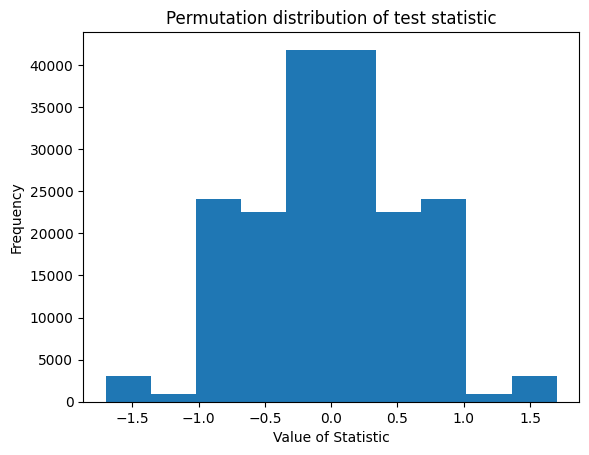

In [25]:
plt.hist(res_g.null_distribution, bins=10)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.show()

# P-values for all stats (WGAN and P2P)

In [26]:
continuado_wgan_stats.columns[1:]

Index(['Sens TB Val', 'Spec TB Val', 'SP TB Val', 'Sens TB Treino',
       'Spec TB Treino', 'SP TB Treino', 'Sens TB Treino + Val',
       'Spec TB Treino + Val', 'SP TB Treino + Val', 'Sens TB Teste',
       'Spec TB Teste', 'SP TB Teste', 'Sens TB Todos', 'Spec TB Todos',
       'SP TB Todos'],
      dtype='object')

## Diferença de médias

In [27]:
dic_res = {}
for i in continuado_wgan_stats.columns[1:]:
    res_wgan_i = stats.permutation_test((continuado_wgan_stats[i].to_numpy(), continuado_real_stats[i].to_numpy()), statistic_mean, vectorized=True,
                        n_resamples=np.inf, alternative='greater')
    res_p2p_i = stats.permutation_test((continuado_p2p_stats[i].to_numpy(), continuado_real_stats[i].to_numpy()), statistic_mean, vectorized=True,
                        n_resamples=np.inf, alternative='greater')

    dic_res[i] = [res_wgan_i.pvalue, res_p2p_i.pvalue]
df_pvalue = pd.DataFrame.from_dict(dic_res, orient='index', columns = ['WGAN', 'P2P'])
df_pvalue

,WGAN,P2P
Sens TB Val,0.035604,0.634935
Spec TB Val,0.062883,0.523913
SP TB Val,0.033201,0.500000
Sens TB Treino,0.000005,0.490653
Spec TB Treino,0.000011,0.514527
SP TB Treino,0.000005,0.515496
Sens TB Treino + Val,0.000005,0.485608
Spec TB Treino + Val,0.000011,0.511902
SP TB Treino + Val,0.000005,0.512243
Sens TB Teste,0.558461,0.558244


## Diferença de medianas

In [28]:
dic_res = {}
for i in continuado_wgan_stats.columns[1:]:
    res_wgan_i = stats.permutation_test((continuado_wgan_stats[i].to_numpy(), continuado_real_stats[i].to_numpy()), statistic_median, vectorized=True,
                        n_resamples=np.inf, alternative='greater')
    res_p2p_i = stats.permutation_test((continuado_p2p_stats[i].to_numpy(), continuado_real_stats[i].to_numpy()), statistic_median, vectorized=True,
                        n_resamples=np.inf, alternative='greater')

    dic_res[i] = [res_wgan_i.pvalue, res_p2p_i.pvalue]
df_pvalue = pd.DataFrame.from_dict(dic_res, orient='index', columns = ['WGAN', 'P2P'])
df_pvalue

,WGAN,P2P
Sens TB Val,0.035604,0.634935
Spec TB Val,0.062883,0.523913
SP TB Val,0.033201,0.500000
Sens TB Treino,0.000005,0.490653
Spec TB Treino,0.000011,0.514527
SP TB Treino,0.000005,0.515496
Sens TB Treino + Val,0.000005,0.485608
Spec TB Treino + Val,0.000011,0.511902
SP TB Treino + Val,0.000005,0.512243
Sens TB Teste,0.558461,0.558244


# P-value correction

In [218]:
r, pvalue, null = res_g.statistic, res_g.pvalue, res_g.null_distribution

In [219]:
unique = np.unique(null)
unique[np.isclose(r, unique)].tolist()

[1.0, 1.0000000000000142]

In [220]:
incorrect_pvalue = np.count_nonzero(null >= r) / len(null)
incorrect_pvalue

0.03560371517027864

In [229]:
correct_pvalue = np.count_nonzero(null >= r - 1e-14) / len(null)
correct_pvalue

0.03560371517027864

In [226]:
pvalue

0.03560371517027864

# Less

In [189]:
res_l = stats.permutation_test((continuado_wgan_stats[stat2look].to_numpy(), continuado_real_stats[stat2look].to_numpy()), statistic, vectorized=True,
                        n_resamples=np.inf, alternative='less')

In [190]:
print(res_l.statistic)

1.0


In [191]:
print(res_l.pvalue)

0.9770616380523501


# Rodando todas as estratégias para todas as doenças

## TB

### TB (p-valores por estratégia - teste unilateral - H0: empate, H1 (greater): u_sintéticas > u_reais)

In [42]:
#Real
continuado_real_stats = pd.read_excel('continuado_figuras_merito.xlsx', sheet_name='Real')
continuado_real_stats = continuado_real_stats[continuado_real_stats['Modelo'].str.contains("Shenzhen")]

#WGAN soFC
continuado_wganFC_stats = pd.read_excel('continuado_figuras_merito.xlsx', sheet_name='WGAN_soFC')
continuado_wganFC_stats = continuado_wganFC_stats[continuado_wganFC_stats['Modelo'].str.contains("Shenzhenfinetune")]

#WGAN allshared
continuado_wganALL_stats = pd.read_excel('continuado_figuras_merito.xlsx', sheet_name='WGAN_allshared')
continuado_wganALL_stats = continuado_wganALL_stats[continuado_wganALL_stats['Modelo'].str.contains("Shenzhenfinetune")]


#P2P soFC
continuado_p2pFC_stats = pd.read_excel('continuado_figuras_merito.xlsx', sheet_name='P2P_soFC')
continuado_p2pFC_stats = continuado_p2pFC_stats[continuado_p2pFC_stats['Modelo'].str.contains("Shenzhenfinetune")]

#WGAN allshared
continuado_p2pALL_stats = pd.read_excel('continuado_figuras_merito.xlsx', sheet_name='P2P_allshared')
continuado_p2pALL_stats = continuado_p2pALL_stats[continuado_p2pALL_stats['Modelo'].str.contains("Shenzhenfinetune")]


dic_res = {}
for i in continuado_wganFC_stats.columns[1:]:
    
    #FC
    res_wganFC_i = stats.permutation_test((continuado_wganFC_stats[i].to_numpy(), continuado_real_stats[i].to_numpy()), statistic_mean, vectorized=True,
                        n_resamples=np.inf, alternative='greater')
    res_p2pFC_i = stats.permutation_test((continuado_p2pFC_stats[i].to_numpy(), continuado_real_stats[i].to_numpy()), statistic_mean, vectorized=True,
                        n_resamples=np.inf, alternative='greater')
    #AllShared
    res_wganALL_i = stats.permutation_test((continuado_wganALL_stats[i].to_numpy(), continuado_real_stats[i].to_numpy()), statistic_mean, vectorized=True,
                        n_resamples=np.inf, alternative='greater')
    res_p2pALL_i = stats.permutation_test((continuado_p2pALL_stats[i].to_numpy(), continuado_real_stats[i].to_numpy()), statistic_mean, vectorized=True,
                        n_resamples=np.inf, alternative='greater')


    
    dic_res[i] = [res_wganFC_i.pvalue, res_p2pFC_i.pvalue, res_wganALL_i.pvalue, res_p2pALL_i.pvalue]
df_pvalue = pd.DataFrame.from_dict(dic_res, orient='index', columns = ['WGAN_soFC', 'P2P_soFC', 'WGAN_allshared', 'P2P_allshared'])
df_pvalue


,WGAN_soFC,P2P_soFC,WGAN_allshared,P2P_allshared
Sens TB Val,0.035604,0.634935,0.182906,0.634935
Spec TB Val,0.062883,0.523913,0.764489,0.328633
SP TB Val,0.033201,0.500000,0.744328,0.318593
Sens TB Treino,0.000005,0.490653,0.861563,0.661792
Spec TB Treino,0.000011,0.514527,0.251207,0.329651
SP TB Treino,0.000005,0.515496,0.374629,0.346690
Sens TB Treino + Val,0.000005,0.485608,0.847512,0.654626
Spec TB Treino + Val,0.000011,0.511902,0.288678,0.325662
SP TB Treino + Val,0.000005,0.512243,0.406758,0.341120
Sens TB Teste,0.558461,0.558244,0.586785,0.654967


## Pneumonia

### Pneumonia (p-valores por estratégia - teste unilateral - H0: empate, H1 (less): u_sintéticas < u_reais)

In [45]:
#Real
continuado_real_stats = pd.read_excel('continuado_figuras_merito_Pneumonia.xlsx', sheet_name='Real')
continuado_real_stats = continuado_real_stats[continuado_real_stats['Modelo'].str.contains("Shenzhen")]

#WGAN soFC
continuado_wganFC_stats = pd.read_excel('continuado_figuras_merito_Pneumonia.xlsx', sheet_name='WGAN_soFC')
continuado_wganFC_stats = continuado_wganFC_stats[continuado_wganFC_stats['Modelo'].str.contains("Shenzhenfinetune")]

#WGAN allshared
continuado_wganALL_stats = pd.read_excel('continuado_figuras_merito_Pneumonia.xlsx', sheet_name='WGAN_allshared')
continuado_wganALL_stats = continuado_wganALL_stats[continuado_wganALL_stats['Modelo'].str.contains("Shenzhenfinetune")]


#P2P soFC
continuado_p2pFC_stats = pd.read_excel('continuado_figuras_merito_Pneumonia.xlsx', sheet_name='P2P_soFC')
continuado_p2pFC_stats = continuado_p2pFC_stats[continuado_p2pFC_stats['Modelo'].str.contains("Shenzhenfinetune")]

#WGAN allshared
continuado_p2pALL_stats = pd.read_excel('continuado_figuras_merito_Pneumonia.xlsx', sheet_name='P2P_allshared')
continuado_p2pALL_stats = continuado_p2pALL_stats[continuado_p2pALL_stats['Modelo'].str.contains("Shenzhenfinetune")]


dic_res = {}
for i in continuado_wganFC_stats.columns[1:]:
    
    #FC
    res_wganFC_i = stats.permutation_test((continuado_wganFC_stats[i].to_numpy(), continuado_real_stats[i].to_numpy()), statistic_mean, vectorized=True,
                        n_resamples=np.inf, alternative='less')
    res_p2pFC_i = stats.permutation_test((continuado_p2pFC_stats[i].to_numpy(), continuado_real_stats[i].to_numpy()), statistic_mean, vectorized=True,
                        n_resamples=np.inf, alternative='less')
    #AllShared
    res_wganALL_i = stats.permutation_test((continuado_wganALL_stats[i].to_numpy(), continuado_real_stats[i].to_numpy()), statistic_mean, vectorized=True,
                        n_resamples=np.inf, alternative='less')
    res_p2pALL_i = stats.permutation_test((continuado_p2pALL_stats[i].to_numpy(), continuado_real_stats[i].to_numpy()), statistic_mean, vectorized=True,
                        n_resamples=np.inf, alternative='less')


    
    dic_res[i] = [res_wganFC_i.pvalue, res_p2pFC_i.pvalue, res_wganALL_i.pvalue, res_p2pALL_i.pvalue]
df_pvalue = pd.DataFrame.from_dict(dic_res, orient='index', columns = ['WGAN_soFC', 'P2P_soFC', 'WGAN_allshared', 'P2P_allshared'])
df_pvalue


,WGAN_soFC,P2P_soFC,WGAN_allshared,P2P_allshared
Sens Pneumo Val,0.367187,0.753361,0.560155,0.611222
Spec Pneumo Val,0.513147,0.178165,0.528735,0.398282
SP Pneumo Val,0.408512,0.411543,0.519956,0.505764
Sens Pneumo Treino,0.329694,0.812012,0.642799,0.642615
Spec Pneumo Treino,0.111520,0.137479,0.044610,0.216751
SP Pneumo Treino,0.000942,0.549330,0.007074,0.303914
Sens Pneumo Treino + Val,0.322728,0.820931,0.640715,0.650999
Spec Pneumo Treino + Val,0.135422,0.116781,0.060312,0.225903
SP Pneumo Treino + Val,0.000319,0.504958,0.005396,0.276462
Sens Pneumo Teste,0.334447,0.637760,0.566596,0.567608
